In [5]:
#laod CSV File as pd and name titanic_data
#load needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


titanic_data=pd.read_csv("titanic-data.csv")



In [6]:
#Questions I'd like to explore:
#1.  Were the survivors more likely to be women or children?
#2.  What was the average ticket price of the survivors and did cost of the ticket matter in survivability?

In [94]:
#use this to see data when needed
#max rows = 1000 so i can see all data
#May not be needed but I wanted to see what the data looks like
pd.options.display.max_rows = 1000
print titanic_data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
#magic.....really. I learned this command will activate pylab (matplotlib, numpy and interactive support)
#still trying to understand the importance of this but i think i need it.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
#look at subset of data.  For question 1 i care more about the Survived, Sex and Age fields
titanic_subset=titanic_data.groupby(['PassengerId', 'Survived', 'Sex', 'Age'])
print titanic_subset['Survived'].first().head(n=15)



PassengerId  Survived  Sex     Age 
1            0         male    22.0    0
2            1         female  38.0    1
3            1         female  26.0    1
4            1         female  35.0    1
5            0         male    35.0    0
7            0         male    54.0    0
8            0         male    2.0     0
9            1         female  27.0    1
10           1         female  14.0    1
11           1         female  4.0     1
12           1         female  58.0    1
13           0         male    20.0    0
14           0         male    39.0    0
15           0         female  14.0    0
16           1         female  55.0    1
Name: Survived, dtype: int64


In [25]:
#not sure what i'm doing here.....
titanic_subset['Age'].mean().head(n=10)

PassengerId  Survived  Sex     Age 
1            0         male    22.0    22.0
2            1         female  38.0    38.0
3            1         female  26.0    26.0
4            1         female  35.0    35.0
5            0         male    35.0    35.0
7            0         male    54.0    54.0
8            0         male    2.0      2.0
9            1         female  27.0    27.0
10           1         female  14.0    14.0
11           1         female  4.0      4.0
Name: Age, dtype: float64

In [17]:
y=titanic_subset['Survived']
print y

In [27]:
#The 4 fields i care about are PassengerID, Survived, Sex and Age for question #1
#From this we can see 38.38% of the passengers survived

titanic_data[['PassengerId', 'Survived', 'Sex', 'Age']].describe()





,PassengerId,Survived,Age
count,891.000000,891.000000,714.000000
mean,446.000000,0.383838,29.699118
std,257.353842,0.486592,14.526497
min,1.000000,0.000000,0.420000
25%,223.500000,0.000000,20.125000
50%,446.000000,0.000000,28.000000
75%,668.500000,1.000000,38.000000
max,891.000000,1.000000,80.000000


In [31]:
#now I want to know how many of each sex and from the following I learn that there were 577 males 
titanic_data[['Sex']].describe()



,Sex
count,891
unique,2
top,male
freq,577


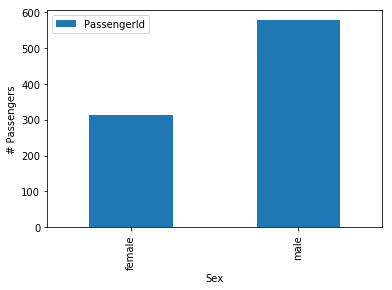

In [55]:
#Graphically, the division by sex upon the launch looks like this
titanic_data.groupby(['Sex'])[['PassengerId']].count().plot(kind='bar').set_ylabel('# Passengers')

In [96]:
#I can tell that only 12.22% of the survivesrs were males surved and 26.15% of the survivors were females
ratio=titanic_data.groupby(['Sex'])['Survived'].sum()/891
ratio

Sex
female    0.261504
male      0.122334
Name: Survived, dtype: float64

In [82]:
survivors=titanic_data.groupby(['Sex'])['Survived'].sum()
survivors

Sex
female    233
male      109
Name: Survived, dtype: int64

In [100]:
#to look at question #2, i want to get a distribution by ticket price for both passengers at time of lauch and survived
titanic_data.groupby(['Pclass']).sum()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [99]:
titanic_data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

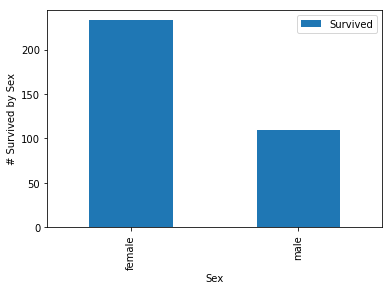

In [59]:

#titanic_data.groupby(['Sex' ])[['Survived']].count().stack().plot(kind='bar').set_ylabel('Count')
#graphically it looks like this.....
#Even though we started with 577 males, there were over twice as many surviving females.
df_sex_survived = titanic_data[(titanic_data.Survived)==1]
df_sex_survived.groupby(['Sex'])[['Survived']].sum().plot(kind='bar').set_ylabel('# Survived by Sex')
plt.show()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


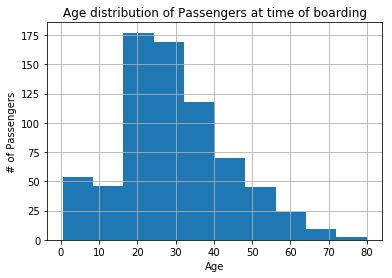

In [62]:
#here's a histogram of the age of the passengers
ax = titanic_data['Age'].hist()
ax.set_ylabel('# of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age distribution of Passengers at time of boarding')
pd.DataFrame(titanic_data['Age'].describe())


,Age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


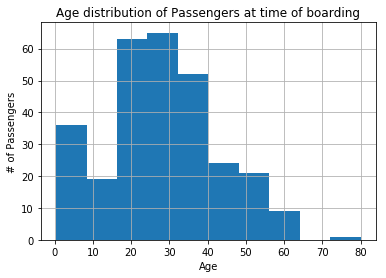

In [78]:
#here's a histogram of the age of the passengers
#clearly there was a concerted effort to protect the young

df_sex_survived = titanic_data[(titanic_data.Survived)==1]
ax = df_sex_survived['Age'].hist()
ax.set_ylabel('# of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age distribution of Passengers at time of boarding')
pd.DataFrame(df_sex_survived['Age'].describe())


In [ ]:
#In general, in response to Q#1 womean and children had higher survivability ratios

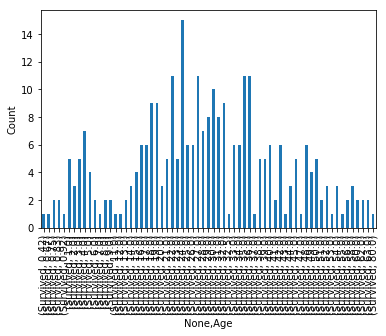

In [36]:
df_age_survived = titanic_data[(titanic_data.Survived)==1].copy()
df_age_survived.groupby(['Age'])[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Count')
plt.show()

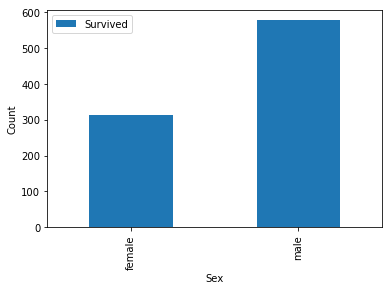

In [60]:
titanic_data.groupby(['Sex'])[['Survived']].count().plot(kind='bar').set_ylabel('Count')

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


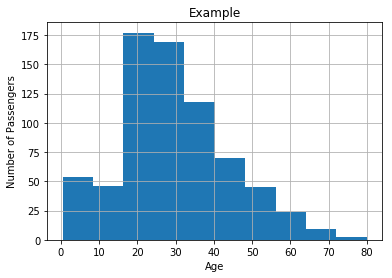

In [105]:
ax = titanic_data['Age'].hist()
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Age')
ax.set_title('Example')
pd.DataFrame(titanic_data['Age'].describe())


In [107]:

titanic_data['Age_categories'] = pd.cut(titanic_data['Age'], bins=[0,18,49,90], labels=["Child","Adult","Senior"])


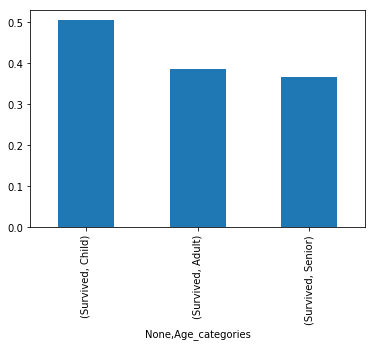

In [108]:
titanic_data.groupby(['Age_categories'])[['Survived']].mean().unstack().plot(kind='bar')

In [97]:
titanic_data.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [51]:
x.sort_values()

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [48]:
y=x.groups
#y.sort(['Survived', 'Sex'], ascending=[True, False])
z=sorted(y)

In [67]:
dead=[]
for e in z:
    if e[1]==0:
        dead.append(e)
        
print dead
print '****',len(dead)
count=0
for e in dead:
    if e[2]=='male':
        count=count+1
    
print '#### males dead',count

[(1L, 0L, 'male', 22.0), (5L, 0L, 'male', 35.0), (6L, 0L, 'male', nan), (7L, 0L, 'male', 54.0), (8L, 0L, 'male', 2.0), (13L, 0L, 'male', 20.0), (14L, 0L, 'male', 39.0), (15L, 0L, 'female', 14.0), (17L, 0L, 'male', 2.0), (19L, 0L, 'female', 31.0), (21L, 0L, 'male', 35.0), (25L, 0L, 'female', 8.0), (27L, 0L, 'male', nan), (28L, 0L, 'male', 19.0), (30L, 0L, 'male', nan), (31L, 0L, 'male', 40.0), (34L, 0L, 'male', 66.0), (35L, 0L, 'male', 28.0), (36L, 0L, 'male', 42.0), (38L, 0L, 'male', 21.0), (39L, 0L, 'female', 18.0), (41L, 0L, 'female', 40.0), (42L, 0L, 'female', 27.0), (43L, 0L, 'male', nan), (46L, 0L, 'male', nan), (47L, 0L, 'male', nan), (49L, 0L, 'male', nan), (50L, 0L, 'female', 18.0), (51L, 0L, 'male', 7.0), (52L, 0L, 'male', 21.0), (55L, 0L, 'male', 65.0), (58L, 0L, 'male', 28.5), (60L, 0L, 'male', 11.0), (61L, 0L, 'male', 22.0), (63L, 0L, 'male', 45.0), (64L, 0L, 'male', 4.0), (65L, 0L, 'male', nan), (68L, 0L, 'male', 19.0), (70L, 0L, 'male', 26.0), (71L, 0L, 'male', 32.0), (72

In [68]:
alive=[]
for e in z:
    if e[1]==1:
        alive.append(e)
        
print alive
print "*****",len(alive)

count=0
for e in alive:
    if e[2]=='male':
        count=count+1
    
print '#### males alive',count

[(2L, 1L, 'female', 38.0), (3L, 1L, 'female', 26.0), (4L, 1L, 'female', 35.0), (9L, 1L, 'female', 27.0), (10L, 1L, 'female', 14.0), (11L, 1L, 'female', 4.0), (12L, 1L, 'female', 58.0), (16L, 1L, 'female', 55.0), (18L, 1L, 'male', nan), (20L, 1L, 'female', nan), (22L, 1L, 'male', 34.0), (23L, 1L, 'female', 15.0), (24L, 1L, 'male', 28.0), (26L, 1L, 'female', 38.0), (29L, 1L, 'female', nan), (32L, 1L, 'female', nan), (33L, 1L, 'female', nan), (37L, 1L, 'male', nan), (40L, 1L, 'female', 14.0), (44L, 1L, 'female', 3.0), (45L, 1L, 'female', 19.0), (48L, 1L, 'female', nan), (53L, 1L, 'female', 49.0), (54L, 1L, 'female', 29.0), (56L, 1L, 'male', nan), (57L, 1L, 'female', 21.0), (59L, 1L, 'female', 5.0), (62L, 1L, 'female', 38.0), (66L, 1L, 'male', nan), (67L, 1L, 'female', 29.0), (69L, 1L, 'female', 17.0), (75L, 1L, 'male', 32.0), (79L, 1L, 'male', 0.83), (80L, 1L, 'female', 30.0), (82L, 1L, 'male', 29.0), (83L, 1L, 'female', nan), (85L, 1L, 'female', 17.0), (86L, 1L, 'female', 33.0), (89L, 1L